# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
X = df[['DiabetesPedigreeFunction', 'Glucose', 'BMI', 'Age']]
y = df['Outcome']

In [4]:
X.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.627,148,33.6,50
1,0.351,85,26.6,31
2,0.672,183,23.3,32
3,0.167,89,28.1,21
4,2.288,137,43.1,33


In [5]:
X.shape

(768, 4)

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
y.shape

(768,)

In [8]:
y.value_counts()/768

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

***

# Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_sc = StandardScaler()

In [11]:
X_std = X_sc.fit_transform(X)

In [12]:
X_std = pd.DataFrame(data=X_std, columns=X.columns)
X_std.head()

,DiabetesPedigreeFunction,Glucose,BMI,Age
0,0.468492,0.848324,0.204013,1.425995
1,-0.365061,-1.123396,-0.684422,-0.190672
2,0.604397,1.943724,-1.103255,-0.105584
3,-0.920763,-0.998208,-0.494043,-1.041549
4,5.484909,0.504055,1.409746,-0.020496


***

# Devide Train test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)

***

# Model Performance

## Performance Function

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [16]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
#     print accuracy score, classification report, confusion metrics
    if train:
#         training performance
        print('Train Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_train, clf.predict(X_train))))
        print('Classification Report : \n {} \n'.format(classification_report(y_train, clf.predict(X_train))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train, cv = 10, scoring='accuracy')
        print('Average Accuracy : {0:.4f}\n'.format(np.mean(res)))
        print('Accuracy SD : {0:.4f}\n'.format(np.std(res)))
        
    elif train == False:
#         test performance
        print('Test Result : \n')
        print('Accuracy Score {0:.4f}\n'.format(accuracy_score(y_test, clf.predict(X_test))))
        print('Classification Report : \n {}\n'.format(classification_report(y_test, clf.predict(X_test))))
        print('Confusion Metrics : \n {} \n'.format(confusion_matrix(y_test, clf.predict(X_test))))
        

## Different models

### SVM

In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC(kernel='linear')

In [19]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
print_score(clf, X_train, X_test, y_train, y_test, train = True)

Train Result : 

Accuracy Score 0.7752

Classification Report : 
              precision    recall  f1-score   support

          0       0.79      0.89      0.84       401
          1       0.73      0.56      0.63       213

avg / total       0.77      0.78      0.77       614
 

Confusion Metrics : 
 [[356  45]
 [ 93 120]] 

Average Accuracy : 0.7770

Accuracy SD : 0.0329



In [21]:
print_score(clf, X_train, X_test, y_train, y_test, train = False)

Test Result : 

Accuracy Score 0.7662

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.85      0.82        99
          1       0.69      0.62      0.65        55

avg / total       0.76      0.77      0.76       154


Confusion Metrics : 
 [[84 15]
 [21 34]] 



### Using Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
params = {'C': range(1,20),
          'degree': [1, 2, 3],
          'kernel': ['rbf','linear','poly'],
          'gamma': [0.001,0.01,0.1,1]}

In [24]:
grid_clf = GridSearchCV(clf, param_grid=params, n_jobs=-1)

In [25]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': range(1, 20), 'degree': [1, 2, 3], 'kernel': ['rbf', 'linear', 'poly'], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
grid_clf.best_score_

0.78013029315960913

In [27]:
grid_clf.best_estimator_

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print_score(grid_clf, X_train, X_test, y_train, y_test, train = True)

Train Result : 

Accuracy Score 0.7834

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.90      0.84       401
          1       0.74      0.57      0.65       213

avg / total       0.78      0.78      0.78       614
 

Confusion Metrics : 
 [[359  42]
 [ 91 122]] 

Average Accuracy : 0.7705

Accuracy SD : 0.0319



In [29]:
print_score(grid_clf, X_train, X_test, y_train, y_test, train = False)

Test Result : 

Accuracy Score 0.7727

Classification Report : 
              precision    recall  f1-score   support

          0       0.81      0.85      0.83        99
          1       0.70      0.64      0.67        55

avg / total       0.77      0.77      0.77       154


Confusion Metrics : 
 [[84 15]
 [20 35]] 



## With Class Weight

In [30]:
clf = SVC(class_weight= {0:0.35, 1: 0.65})

In [31]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 0.35, 1: 0.65}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
print_score(clf, X_train, X_test, y_train, y_test, train = True)
print_score(clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.7818

Classification Report : 
              precision    recall  f1-score   support

          0       0.88      0.77      0.82       401
          1       0.65      0.81      0.72       213

avg / total       0.80      0.78      0.79       614
 

Confusion Metrics : 
 [[307  94]
 [ 40 173]] 

Average Accuracy : 0.7490

Accuracy SD : 0.0482

Test Result : 

Accuracy Score 0.7338

Classification Report : 
              precision    recall  f1-score   support

          0       0.86      0.70      0.77        99
          1       0.59      0.80      0.68        55

avg / total       0.77      0.73      0.74       154


Confusion Metrics : 
 [[69 30]
 [11 44]] 



## Grid Search

In [33]:
grid_clf = GridSearchCV(clf, param_grid=params, n_jobs=-1)

In [34]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.35, 1: 0.65}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': range(1, 20), 'degree': [1, 2, 3], 'kernel': ['rbf', 'linear', 'poly'], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
grid_clf.best_score_

0.77524429967426711

In [36]:
grid_clf.best_estimator_

SVC(C=9, cache_size=200, class_weight={0: 0.35, 1: 0.65}, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.001, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print_score(grid_clf, X_train, X_test, y_train, y_test, train = True)
print_score(grid_clf, X_train, X_test, y_train, y_test, train = False)

Train Result : 

Accuracy Score 0.7638

Classification Report : 
              precision    recall  f1-score   support

          0       0.83      0.80      0.82       401
          1       0.65      0.69      0.67       213

avg / total       0.77      0.76      0.77       614
 

Confusion Metrics : 
 [[322  79]
 [ 66 147]] 

Average Accuracy : 0.7604

Accuracy SD : 0.0579

Test Result : 

Accuracy Score 0.6948

Classification Report : 
              precision    recall  f1-score   support

          0       0.80      0.71      0.75        99
          1       0.56      0.67      0.61        55

avg / total       0.71      0.69      0.70       154


Confusion Metrics : 
 [[70 29]
 [18 37]] 



## ROC Curve

In [38]:
from sklearn.metrics import roc_curve

In [39]:
y_scores = cross_val_predict(SVC(), X_train, y_train, cv=3, method='decision_function')

In [40]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

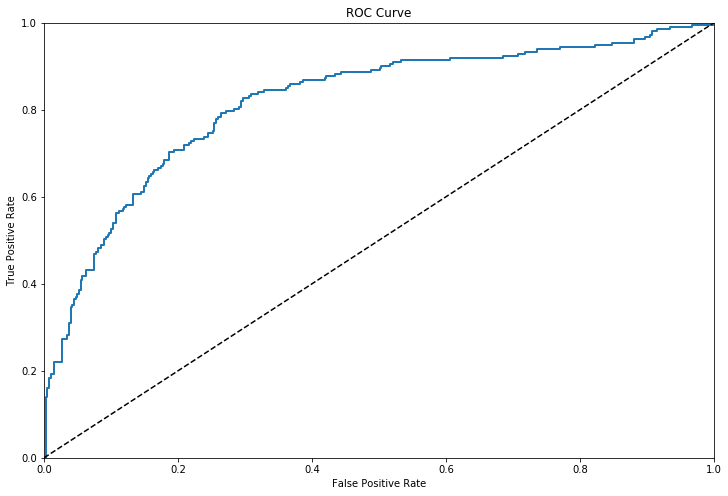

In [42]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();